<a href="https://colab.research.google.com/github/oms77/Funiverse/blob/main/Resu_Matic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install flash_attn einops timm gradio  google-generativeai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 8.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.2/43.2 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 24.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 41.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 kB 10.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.1/318.1 kB 31.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 145.0/145.0 kB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 69.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.4/62.4 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
from transformers import AutoProcessor, AutoModelForCausalLM
from PIL import Image
import requests
import copy
%matplotlib inline

In [ ]:
model_id = 'microsoft/Florence-2-large'
model = AutoModelForCausalLM.from_pretrained(model_id, trust_remote_code=True).eval()
processor = AutoProcessor.from_pretrained(model_id, trust_remote_code=True)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/2.44k [00:00<?, ?B/s]

configuration_florence2.py:   0%|          | 0.00/15.1k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/microsoft/Florence-2-large:
- configuration_florence2.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


modeling_florence2.py:   0%|          | 0.00/127k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/microsoft/Florence-2-large:
- modeling_florence2.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


pytorch_model.bin:   0%|          | 0.00/1.54G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/51.0 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

processing_florence2.py:   0%|          | 0.00/46.4k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/microsoft/Florence-2-large:
- processing_florence2.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


tokenizer_config.json:   0%|          | 0.00/34.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.10M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

In [ ]:
def run_example(task_prompt, text_input=None):
    if text_input is None:
        prompt = task_prompt
    else:
        prompt = task_prompt + text_input
    inputs = processor(text=prompt, images=image, return_tensors="pt")
    generated_ids = model.generate(
      input_ids=inputs["input_ids"],
      pixel_values=inputs["pixel_values"],
      max_new_tokens=1024,
      early_stopping=False,
      do_sample=False,
      num_beams=3,
    )
    generated_text = processor.batch_decode(generated_ids, skip_special_tokens=False)[0]
    parsed_answer = processor.post_process_generation(
        generated_text,
        task=task_prompt,
        image_size=(image.width, image.height)
    )

    return parsed_answer

In [ ]:
path = '/content/sample_data/Screenshot (902).png'
image = Image.open(path).convert('RGB')

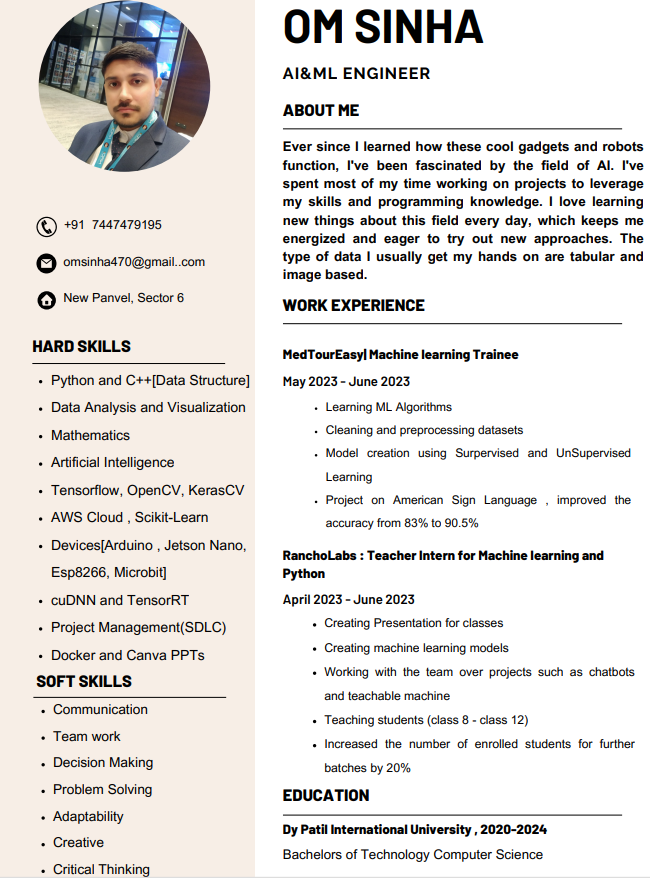

In [ ]:
image

In [ ]:
task_prompt = '<OCR>'
l = run_example(task_prompt)

In [ ]:
l

{'<OCR>': "OM SINHAAi&ML ENGINEERABOUT MEEver since I learned how these cool gadgets and robotsfunction, I've been fascinated by the field of Al. I'vespent most of my time working on projects to leveragemy skills and programming knowledge. I love learning+91 7447479195new things about this field every day, which keeps meenergized and eager to try out new approaches. Theomsinha470@gmail.comtype of data I usually get my hands on are tabular andimage based.New Panel, Sector 6WORK EXPERIENCEHARD SKILLSMedTourEasyMachine learning Trainee. Python and C++(Data Structure)May 2023 - June 2023. Data Analysis and Visualization. Learning ML Algorithms. Mathematics. Cleaning and processing datasets. Artificial Intelligence. Model creation using Supervised and UnSupervisedLearning. Tensorflow, OpenCV, KerasCV. Project on American Sign Language. improved theAWS Cloud, SciKit-Learnaccuracy from 83% to 90.5%Devices(Arduino, Jetson Nano,Rancholabs : Teacher Intern for Machine learning andEsp8266, Microb

In [ ]:
import pathlib
import textwrap

import google.generativeai as genai

from IPython.display import display

from IPython.display import Markdown


def to_markdown(text):
  text = text.replace('•', '  *')
  return Markdown(textwrap.indent(text, '> ', predicate=lambda _: True))

In [ ]:
from google.colab import userdata

GOOGLE_API_KEY=userdata.get('GOOGLE_API_KEY')

genai.configure(api_key=GOOGLE_API_KEY)

In [ ]:
model = genai.GenerativeModel('gemini-1.5-pro-latest')

In [ ]:
str = l['<OCR>']

In [ ]:
response = model.generate_content([str+'grab me skills matching AI engineer and state improvement'], stream=True)
response.resolve()

In [ ]:
to_markdown(response.text)

> ## Om Sinha - AI & ML Engineer 
> 
> Here's a breakdown of your skills matching AI engineer requirements and areas for improvement, based on your provided resume text:
> 
> **Strengths:**
> 
> * **Technical Skills:** You demonstrate a good foundation in AI/ML with experience in:
>     * Programming Languages: Python, C++
>     * ML Libraries/Frameworks: TensorFlow, OpenCV, KerasCV, Scikit-learn
>     * ML Algorithms: Supervised & Unsupervised Learning
>     * Data Handling: Cleaning, processing, analysis, visualization of tabular and image data
>     * Cloud Computing: AWS
>     * Hardware: Arduino, Jetson Nano, ESP8266, Microbit
> * **Projects:** 
>     * American Sign Language project highlights practical application of ML, achieving accuracy improvement. 
>     * Chatbot and Teachable Machine projects showcase exposure to different AI applications.
> * **Enthusiasm:** Your resume conveys genuine passion for AI/ML and continuous learning.
> * **Soft Skills:** You highlight important traits like communication, teamwork, problem-solving, adaptability, and creative thinking.
> 
> **Areas for Improvement:**
> 
> * **Quantify Achievements:** 
>     * **MedTourEasy:**  Instead of listing tasks, quantify your contributions.  
>         * **Example:** "Developed and implemented [specific model type] for [specific problem], resulting in [quantifiable improvement] in [metric]." 
>     * **Rancholabs:**  Instead of "increased enrollment," quantify the impact.
>         * **Example:** "Increased student enrollment by 20%, resulting in [number] additional students for subsequent batches."
> * **Highlight Relevant Coursework:**  List relevant coursework from your B.Tech program, especially those focusing on:
>     * Algorithms and Data Structures
>     * Machine Learning 
>     * Deep Learning
>     * Computer Vision
>     * Mathematics (Calculus, Linear Algebra, Statistics)
> * **Expand Project Descriptions:** Provide more details about your projects:
>     * **Problem Statement:** What specific problem were you trying to solve?
>     * **Methodology:** What techniques did you use? (Data preprocessing, model selection, hyperparameter tuning, etc.)
>     * **Results & Evaluation:** What were the outcomes, and how did you measure success?
> * **Tailor to Job Descriptions:**  Customize your resume for each specific AI Engineer role you apply for, highlighting the skills and experience most relevant to the job requirements.
> * **Consider Personal Projects:**  Developing and showcasing personal AI/ML projects (e.g., on GitHub) can significantly strengthen your profile and demonstrate initiative.
> 
> **General Resume Tips:**
> 
> * **Conciseness:** Keep your resume to one page, highlighting the most impactful information.
> * **Action Verbs:**  Begin bullet points with strong action verbs (developed, implemented, analyzed, etc.).
> * **Keywords:**  Incorporate relevant AI/ML keywords from job descriptions to improve your resume's visibility to Applicant Tracking Systems (ATS).
> 
> 
> By implementing these suggestions, you can strengthen your resume and present yourself as a compelling candidate for AI Engineer roles. 
